<a href="https://colab.research.google.com/github/wantepim84/python-portfolio/blob/main/Rectilinear_polygon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [122]:
#import libraries
import networkx as nx
import matplotlib.pyplot as plt

In [123]:
# Create a NetworkX graph to represent the original polygon
polygon_graph = nx.Graph()

In [124]:
# Define the vertices (points) of the outer polygon
outer_polygon_vertices = [(0, 10), (2, 10), (2, 0), (5, 0),
 (5, 4),(13, 4), (13, 6), (15, 6),
 (15, 0), (19, 0), (19, 4), (28, 4), (28, 6),
  (30, 6), (30, 7), (25, 7), (25, 9), (29, 9), (29,10),
  (27,10), (27,25),(13,25), (13,18), (5, 18),
(5, 22), (0, 22)]

In [125]:
#Define the vertices (points)  for all the holes
hole_vertices1 = [(7, 16), (9, 16), (9, 12), (7, 12)]
hole_vertices2 = [(14, 15), (14, 13), (19, 13), (19, 15)]
hole_vertices3 = [(23, 16), (25, 16), (25, 12), (23, 12)]

In [126]:
# Add nodes for the polygon vertices and hole vertices
polygon_graph.add_nodes_from(outer_polygon_vertices)
polygon_graph.add_nodes_from(hole_vertices1)
polygon_graph.add_nodes_from(hole_vertices2)
polygon_graph.add_nodes_from(hole_vertices3)

In [127]:
# Define the edges of the polygon
outer_polygon_edges = [(outer_polygon_vertices[i], outer_polygon_vertices[i + 1]) for i in range(len(outer_polygon_vertices) - 1)]
outer_polygon_edges.append((outer_polygon_vertices[-1], outer_polygon_vertices[0]))

In [128]:
# Define edges for all holes

# Hole1
hole_edges1 = [(hole_vertices1[i], hole_vertices1[i + 1]) for i in range(len(hole_vertices1) - 1)]
hole_edges1.append((hole_vertices1[-1], hole_vertices1[0]))

# Hole2
hole_edges2 = [(hole_vertices2[i], hole_vertices2[i + 1]) for i in range(len(hole_vertices2) - 1)]
hole_edges2.append((hole_vertices2[-1], hole_vertices2[0]))

# Hole3
hole_edges3 = [(hole_vertices3[i], hole_vertices3[i + 1]) for i in range(len(hole_vertices3) - 1)]
hole_edges3.append((hole_vertices3[-1], hole_vertices3[0]))


In [129]:
# Add edges for the polygon and holes
polygon_graph.add_edges_from(outer_polygon_edges)
polygon_graph.add_edges_from(hole_edges1)
polygon_graph.add_edges_from(hole_edges2)
polygon_graph.add_edges_from(hole_edges3)

In [130]:
# Determine dissection points and dissection rectangles manually
dissection_rectangles = [
    [(5, 4), (5, 18)],[(13,18),(13,6)],
[(19,13), (19,4)],[(9,16), (23,16)], [(9,12), (23,12)],
    [(15,6),(28,6)],[(2,10), (27,10)], [(25,12), (25,9)]
]

In [131]:
# Create a new graph to represent the dissected rectangles
rectangle_graph = nx.Graph()

In [132]:
# Add nodes for the vertices of the rectangles
for rect_vertices in dissection_rectangles:
    rectangle_graph.add_nodes_from(rect_vertices)

In [133]:
# Define the edges for the rectangles
rectangle_edges = [
    (rect_vertices[i], rect_vertices[i + 1]) for rect_vertices in dissection_rectangles for i in range(len(rect_vertices) - 1)
]

In [134]:
# Add edges for the rectangles
rectangle_graph.add_edges_from(rectangle_edges)

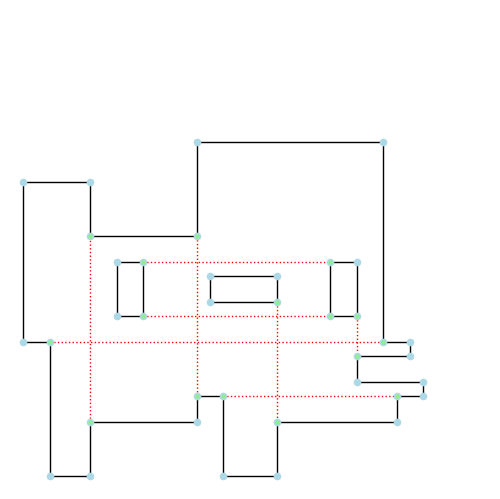

In [135]:
# Visualization
pos = {vertex: vertex for vertex in outer_polygon_vertices + hole_vertices1 + hole_vertices2 + hole_vertices3 + [item for sublist in dissection_rectangles for item in sublist]}  # Position of nodes for plotting
nx.draw(polygon_graph, pos=pos, with_labels=False, node_size=20, node_color='lightblue', font_size=8)
nx.draw(rectangle_graph, pos=pos, node_size=5, node_color='lightgreen', edgelist=rectangle_edges, style= "dotted", edge_color="red")

# Set plot limits
plt.xlim(-1, 35)
plt.ylim(-1, 35)

# Show the plot
plt.gca().set_aspect('equal', adjustable='box')
plt.show()